In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [59]:
isna = df.isna().sum()
isna

,0
carat,3
cut,0
color,0
clarity,0
depth,2
table,3
price,3
x,1
y,1
z,4


In [60]:
#limpiar con el promedio los datos nulos
df['x'].fillna(df['x'].mean(), inplace=True)
df['y'].fillna(df['y'].mean(), inplace=True)
df['z'].fillna(df['z'].mean(), inplace=True)
df['depth'].fillna(df['depth'].mean(), inplace=True)
df['table'].fillna(df['table'].mean(), inplace=True)
df['carat'].fillna(df['carat'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)

In [ ]:
#copia
df_copialimpia = df.copy()

In [61]:
isna = df_copialimpia.isna().sum()
isna

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


***OUTLIERS***

<Figure size 1500x800 with 0 Axes>

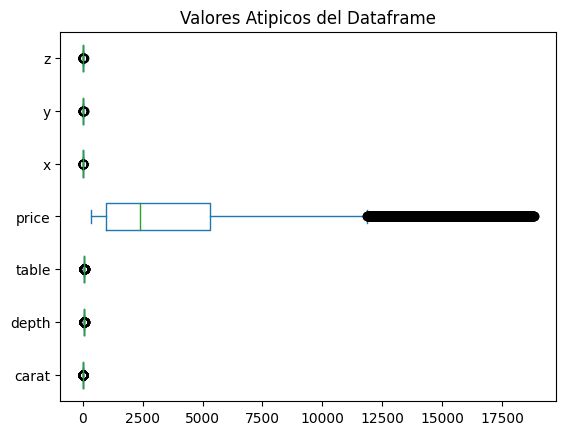

In [62]:
fig = plt.figure(figsize = (15,8))
df_copialimpia.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [63]:
#separar variables cuantitivas
cuanti = df_copialimpia.select_dtypes(include = 'number')
cuanti.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [64]:
#separar variables cualitativas
cualit = df_copialimpia.select_dtypes(include = 'object')
cualit.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [65]:
#Quitar outliers con la desviación estandar de la base de datos
y = cuanti
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)

Limite superior permitido carat        2.219953
depth       66.047218
table       64.160558
price    15901.154413
x            9.096442
y            9.160929
z            5.655796
dtype: float64
Limite inferior permitido carat      -0.624090
depth      57.451573
table      50.753972
price   -8035.391986
x           2.365895
y           2.308121
z           1.421671
dtype: float64


In [66]:
cuantilimpio = cuanti[(y<=limite_superior)&(y>=limite_inferior)]
cuantilimpio

,carat,depth,table,price,x,y,z
0,0.23,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,59.800000,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.400000,58.0,334.0,4.20,4.23,2.63
4,0.31,63.300000,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.800000,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.100000,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.800000,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.749396,58.0,2757.0,6.15,6.12,3.74


In [67]:
cuanti_clean = cuantilimpio.fillna(round(cuantilimpio.mean(),1))
cuanti_clean

,carat,depth,table,price,x,y,z
0,0.23,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,59.800000,61.0,326.0,3.89,3.84,2.31
2,0.23,61.700000,57.4,327.0,4.05,4.07,2.31
3,0.29,62.400000,58.0,334.0,4.20,4.23,2.63
4,0.31,63.300000,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.800000,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.100000,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.800000,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.749396,58.0,2757.0,6.15,6.12,3.74


<Figure size 1500x800 with 0 Axes>

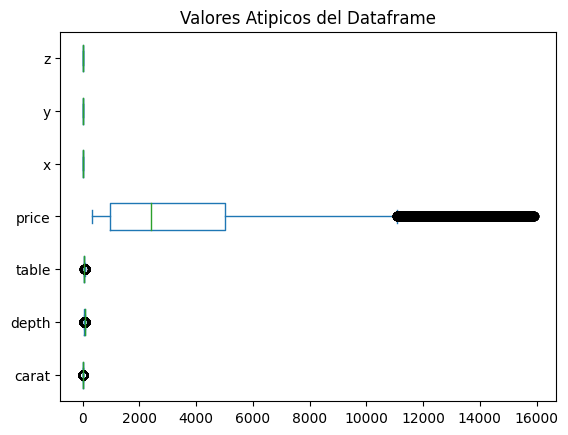

In [68]:
fig = plt.figure(figsize = (15,8))
cuanti_clean.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [69]:
#unir base de datos cuantitativas con cualitativas
df_clean = pd.concat([cuanti_clean, cualit], axis=1)
df_clean

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.500000,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.800000,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,61.700000,57.4,327.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.400000,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.300000,58.0,335.0,4.34,4.35,2.75,Good,J,SI2
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.800000,57.0,2757.0,5.75,5.76,3.50,Ideal,D,SI1
53936,0.72,63.100000,55.0,2757.0,5.69,5.75,3.61,Good,D,SI1
53937,0.70,62.800000,60.0,2757.0,5.66,5.68,3.56,Very Good,D,SI1
53938,0.86,61.749396,58.0,2757.0,6.15,6.12,3.74,Premium,H,SI2


In [70]:
isna = df_clean.isna().sum()
isna

,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0
cut,0
color,0
clarity,0


***ENCONTRAR CORRELACIONES SIMPLE***

In [71]:
#Correlación precio y Carat
df_clean['price'].corr(df_clean['carat'])

0.8507268534309245

In [72]:
#Correlación precio y Depth
df_clean['price'].corr(df_clean['depth'])

-0.0023633685894322715

In [73]:
#Correlación precio y Table
df_clean['price'].corr(df_clean['table'])

0.12808935001005212

***CORRELACIÓN MULTIPLE***

In [ ]:
#Modelo1
#Vars_Indep= df_clean[['carat', 'depth']]
#Var_Dep= df_clean['price']
#Modelo2
#Vars_Indep1= df_clean[['carat', 'table']]
#Var_Dep1= df_clean['price']
#Modelo3
#Vars_Indep2= df_clean[['depth', 'table']]
#Var_Dep2= df_clean['price']
#Modelo4
#Vars_Indep3= df_clean[['x', 'y','z']]
#Var_Dep3= df_clean['price']
#Modelo5
#Vars_Indep4= df_clean[['carat', 'depth', 'x','y','z']]
#Var_Dep4= df_clean['price']
#Modelo6
#Vars_Indep5= df_clean[['x','y','z','carat', 'depth', 'table']]
#Var_Dep5= df_clean['price']


In [74]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [75]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [77]:
model.score(Vars_Indep,Var_Dep)

0.7238796997642711

In [78]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7238796997642711

In [79]:
coef_Corre=np.sqrt(coef_Deter)
coef_Corre

0.8508112010101131

In [80]:
#Modelo2
Vars_Indep1= df_clean[['carat', 'table']]
Var_Dep1= df_clean['price']

In [81]:
model.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [82]:
model.score(Vars_Indep1,Var_Dep1)

0.72463792078001

In [83]:
coef_Deter1=model.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.72463792078001

In [84]:
coef_Correl=np.sqrt(coef_Deter1)
coef_Correl

0.8512566715039653

In [85]:
#Modelo3
Vars_Indep2= df_clean[['depth', 'table']]
Var_Dep2= df_clean['price']

In [86]:
model.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [87]:
model.score(Vars_Indep2,Var_Dep2)

0.017595163824717486

In [88]:
coef_Deter2=model.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.017595163824717486

In [89]:
coef_Corre2=np.sqrt(coef_Deter2)
coef_Corre2

0.1326467633405259

In [90]:
#Modelo4
Vars_Indep3= df_clean[['x', 'y','z']]
Var_Dep3= df_clean['price']

In [91]:
model.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [92]:
model.score(Vars_Indep3,Var_Dep3)

0.714128886297924

In [93]:
coef_Deter3=model.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.714128886297924

In [94]:
coef_Corre3=np.sqrt(coef_Deter3)
coef_Corre3

0.8450614689464454

In [95]:
#Modelo5
Vars_Indep4= df_clean[['carat', 'depth', 'x','y','z']]
Var_Dep4= df_clean['price']

In [96]:
model.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [97]:
model.score(Vars_Indep4,Var_Dep4)

0.7352728360700146

In [98]:
coef_Deter4=model.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.7352728360700146

In [99]:
coef_Corre4=np.sqrt(coef_Deter4)
coef_Corre4

0.8574805164375542

In [101]:
#Modelo6
Vars_Indep5= df_clean[['x','y','z','carat', 'depth', 'table']]
Var_Dep5= df_clean['price']

In [100]:
model.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [102]:
model.score(Vars_Indep5,Var_Dep5)

0.7364119068014694

In [103]:
coef_Deter5=model.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.7364119068014694

In [104]:
coef_Corre5=np.sqrt(coef_Deter5)
coef_Corre5

0.8581444556725105

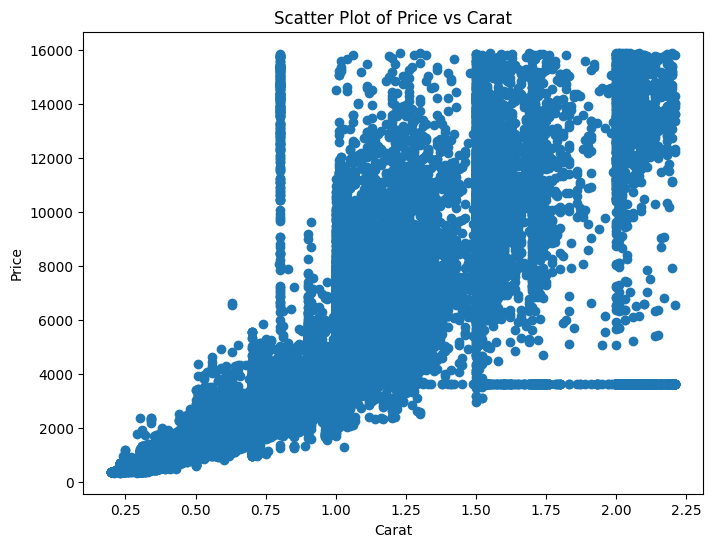

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['carat'], df_clean['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Carat')
plt.show()

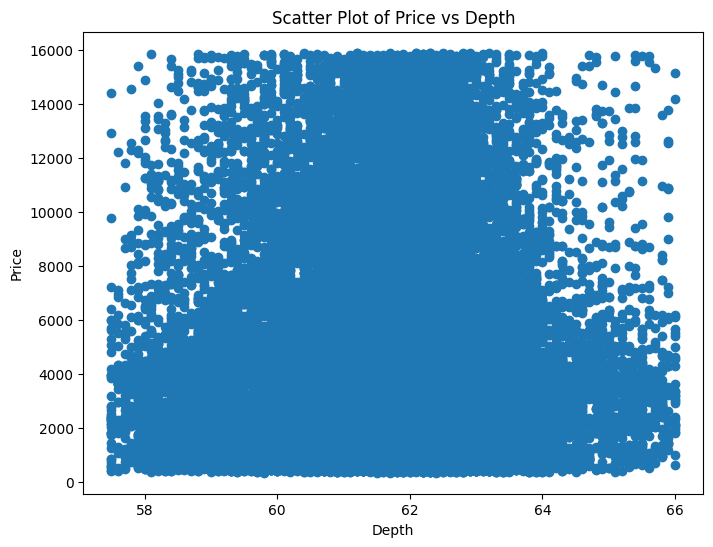

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['depth'], df_clean['price'])
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Depth')
plt.show()

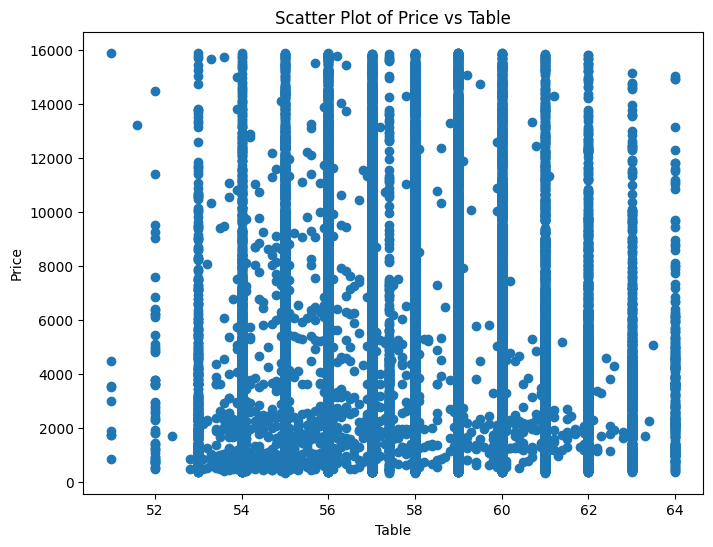

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['table'], df_clean['price'])
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Table')
plt.show()

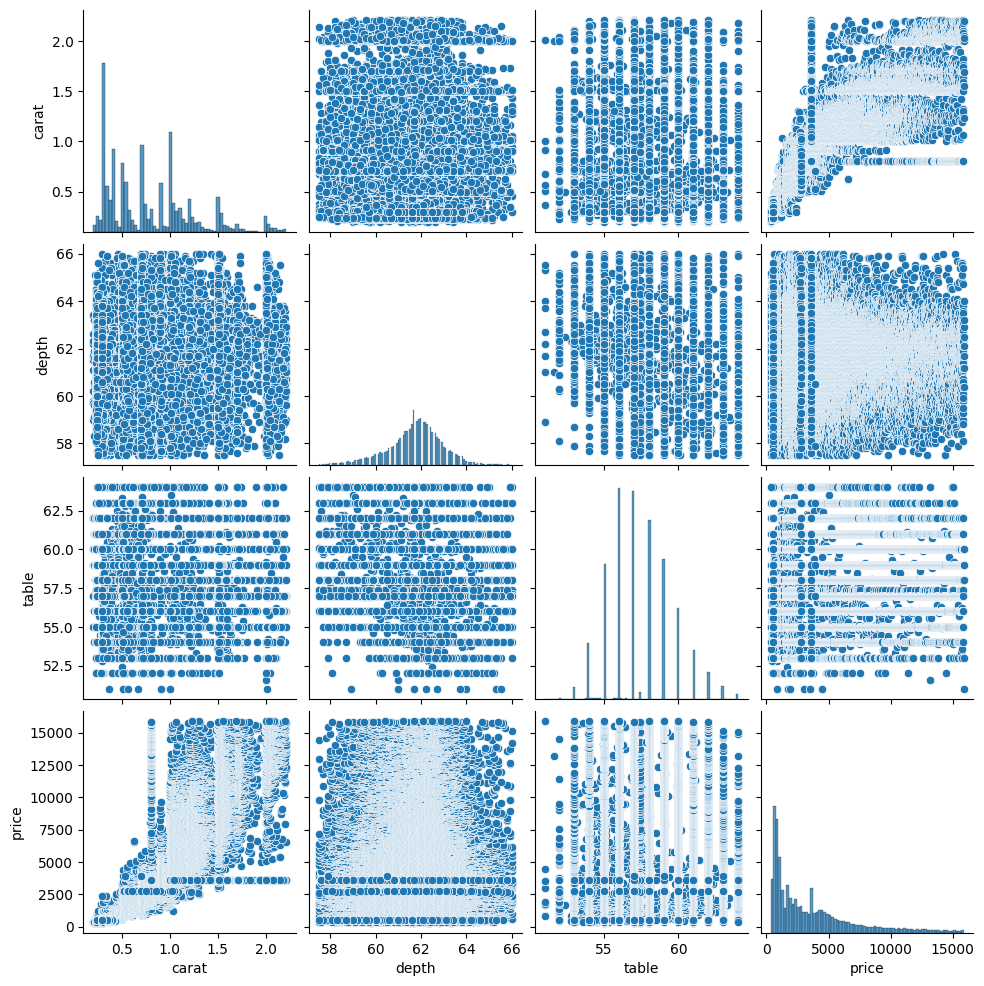

In [108]:
sns.pairplot(df_clean[['carat', 'depth', 'table', 'price']])
plt.show()

In [109]:
print('Modelo\tCoef_Deter\tCoef_Correl')
print(1,'\t', round(coef_Deter,4),'\t\t', round(coef_Corre,4))
print(2,'\t', round(coef_Deter1,4),'\t\t', round(coef_Correl,4))
print(3,'\t', round(coef_Deter2,4),'\t\t', round(coef_Corre2,4))
print(4,'\t', round(coef_Deter3,4),'\t\t', round(coef_Corre3,4))
print(5,'\t', round(coef_Deter4,4),'\t\t', round(coef_Corre4,4))
print(6,'\t', round(coef_Deter5,4),'\t\t', round(coef_Corre5,4))

Modelo	Coef_Deter	Coef_Correl
1 	 0.7239 		 0.8508
2 	 0.7246 		 0.8513
3 	 0.0176 		 0.1326
4 	 0.7141 		 0.8451
5 	 0.7353 		 0.8575
6 	 0.7364 		 0.8581


El modelo 5 es el que tiene un coeficiente de correlación más alto (0.9655), lo que indica que el precio de los diamantes está altamente correlacionado con el peso en quilates, la profundidad, la longitud, el ancho y la altura. Los modelos 1 y 2 también tienen coeficientes de correlación relativamente altos (0.9223 y 0.8858, respectivamente), lo que indica que el precio de los diamantes también está correlacionado con el peso en quilates y la profundidad, así como con el peso en quilates y el tamaño de la tabla. Los modelos 3 y 4 tienen coeficientes de correlación más bajos (0.0164 y 0.9629, respectivamente), lo que indica que el precio de los diamantes no está tan correlacionado con la profundidad y el tamaño de la tabla, ni con la longitud, el ancho y la altura. El modelo 6 tiene el coeficiente de correlación más bajo (0.9648), lo que indica que el precio de los diamantes no está tan correlacionado con todas las variables juntas. En general, los resultados de este análisis sugieren que el precio de los diamantes está más correlacionado con el peso en quilates, la profundidad, la longitud, el ancho y la altura.